In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error as mae, r2_score, root_mean_squared_error
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [10]:
reg_train = pd.read_csv('/content/regression_train.csv')
reg_train.head()

,target,X1,X2,X3,X4,X5,X6,X7
0,NaN,-0.546168,NaN,47.063305,1.611370,-65.882137,0,-16.672865
1,47.735389,3.074317,-2.836000,49.396649,0.261998,-66.570716,0,-6.664599
2,NaN,-1.485531,-13.102537,42.367991,3.991558,-67.108014,8,-30.790962
3,908.202209,6.907396,-0.308967,57.228787,0.256771,-66.181266,5,-0.726072
4,1640.461863,1.916788,3.460290,51.703375,2.463790,-65.143663,5,8.131680


In [11]:
reg_test = pd.read_csv('/content/regression_test.csv')
reg_test.head()

,target,X1,X2,X3,X4,X5,X6,X7
0,3.436244,0.210854,-2.451307,51.239996,4.641751,-67.874319,5,-5.760571
1,1525.839412,2.157483,4.337776,43.828794,8.070219,-68.405526,8,10.193773
2,455.600191,5.166359,-0.452615,43.931305,1.349625,-66.240021,0,-1.063645
3,0.619759,3.276641,-3.607201,50.631046,2.473542,-69.971690,8,-8.476921
4,10.996472,-1.867485,-2.408863,58.660224,2.826219,-53.647149,5,-5.660827


In [12]:
reg_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  715 non-null    float64
 1   X1      1042 non-null   float64
 2   X2      1031 non-null   float64
 3   X3      1042 non-null   float64
 4   X4      1042 non-null   float64
 5   X5      1042 non-null   float64
 6   X6      1042 non-null   int64  
 7   X7      1042 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 65.2 KB


In [13]:
reg_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  180 non-null    float64
 1   X1      261 non-null    float64
 2   X2      261 non-null    float64
 3   X3      261 non-null    float64
 4   X4      261 non-null    float64
 5   X5      261 non-null    float64
 6   X6      261 non-null    int64  
 7   X7      261 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 16.4 KB


In [14]:
reg_train.describe()

,target,X1,X2,X3,X4,X5,X6,X7
count,715.000000,1042.000000,1031.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,1349.940229,2.421925,-0.460781,52.094329,2.462871,-65.284233,4.381958,-1.287435
std,1593.201095,3.182976,4.426286,31.374828,2.541632,9.033489,3.290306,11.066380
min,0.062551,-8.699406,-13.651540,38.035456,0.002360,-121.450423,0.000000,-69.835905
25%,230.632308,0.170590,-3.307931,47.087106,0.671196,-69.126630,0.000000,-7.830007
50%,808.374368,2.508671,-0.461150,49.972867,1.652609,-65.360660,5.000000,-1.074191
75%,1849.754221,4.540218,2.406651,52.674305,3.361181,-61.187635,8.000000,5.659476
max,10382.469480,12.380693,12.926106,500.000000,18.813009,53.919202,8.000000,30.376348


In [15]:
reg_test.describe()

,target,X1,X2,X3,X4,X5,X6,X7
count,180.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,1083.167620,2.118804,-0.729926,50.019371,2.570686,-65.634193,4.153257,-1.896956
std,1266.764414,2.924070,4.065920,4.109684,2.456733,7.827388,3.345416,10.133573
min,0.619759,-7.187993,-12.530861,38.282205,0.017793,-123.280755,0.000000,-56.751775
25%,203.306229,0.220241,-3.113019,47.368662,0.798704,-69.361831,0.000000,-7.315595
50%,623.905972,2.038765,-0.816475,50.070453,1.824582,-65.517502,5.000000,-1.918715
75%,1522.742335,4.008733,1.836272,52.659709,3.587555,-61.681399,8.000000,4.315239
max,8270.877273,9.586412,11.610249,65.704951,16.798910,-43.237419,8.000000,27.284085


Os conjuntos de teste e treinamento parecem ter comportamentos diferentes no que diz respeito às variáveis X1 e X2

### Análise de correlação

<Axes: >

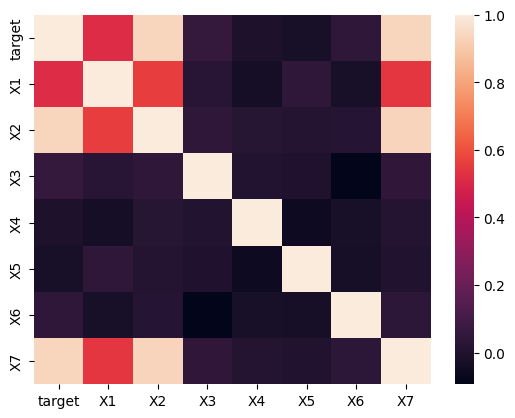

In [16]:
sns.heatmap(reg_train.corr())

<Axes: >

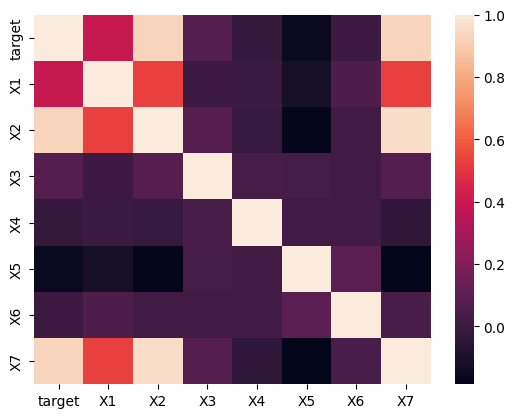

In [17]:
sns.heatmap(reg_test.corr())

Alta correlação entre as variáveis X7 e X2 e, em menor grau, com X1.  
Curiosamente, são também as variáveis com maior correlação em relação à target

<Axes: xlabel='X2', ylabel='X1'>

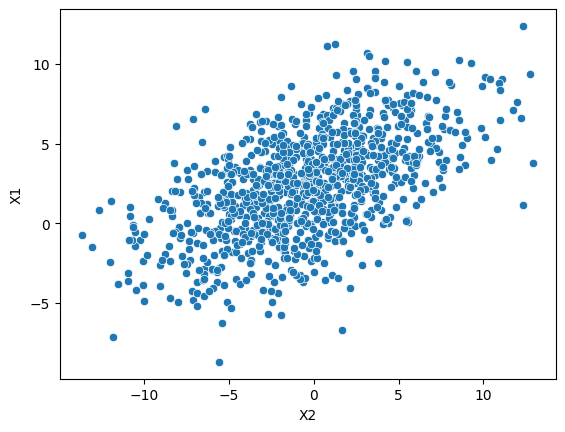

In [18]:
sns.scatterplot(reg_train, x="X2", y="X1")

<Axes: xlabel='X7', ylabel='X1'>

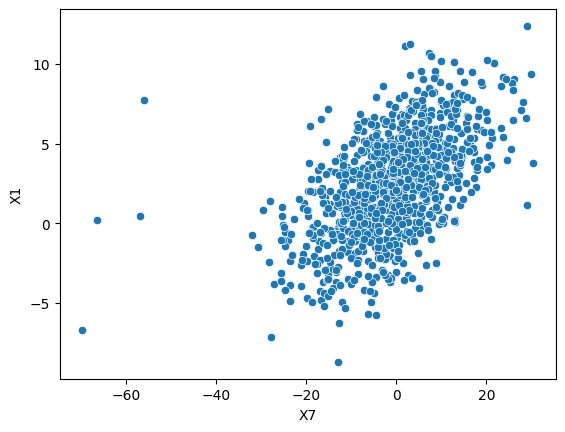

In [19]:
sns.scatterplot(reg_train, x="X7", y="X1")

<Axes: xlabel='X7', ylabel='X2'>

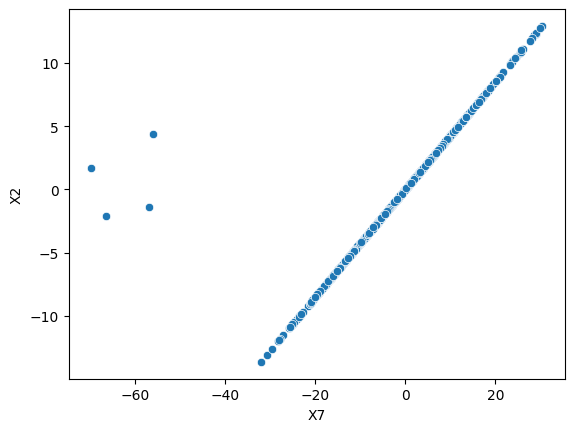

In [20]:
sns.scatterplot(reg_train, x="X7", y="X2")

In [21]:
def plot_feature_correlation(df, target_col):
    features = df.drop(columns=[target_col])
    target = df[target_col]

    correlations = features.corrwith(target).sort_values()
    corr_df = correlations.reset_index().rename(columns={'index': 'feature', 0: 'coef'})

    plt.figure(figsize=(8, 6))
    sns.barplot(data=corr_df, x='coef', y='feature', edgecolor='black')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Feature')
    plt.title(f'Feature Correlation with {target_col}')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

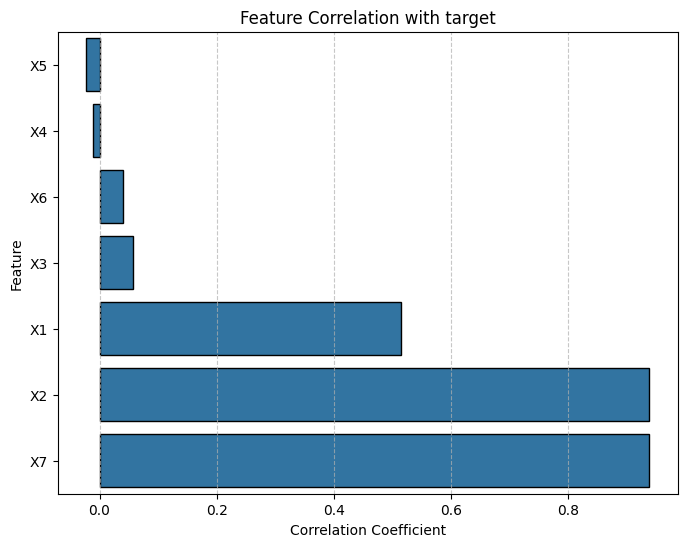

In [22]:
plot_feature_correlation(reg_train, "target")

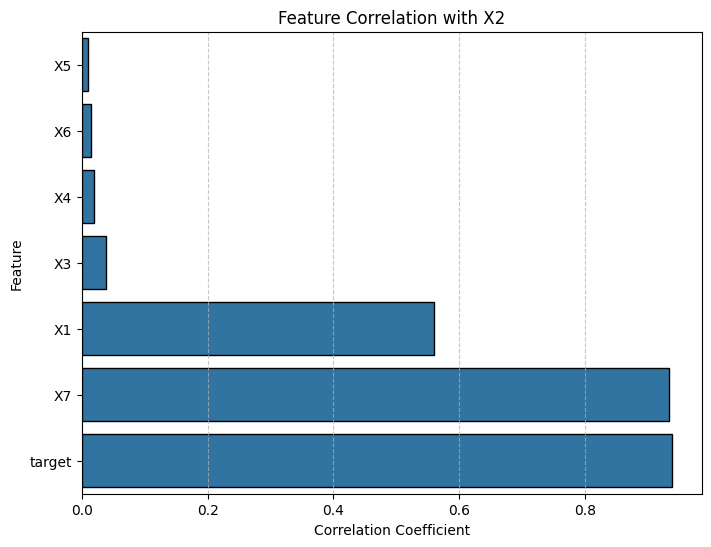

In [23]:
plot_feature_correlation(reg_train, "X2")

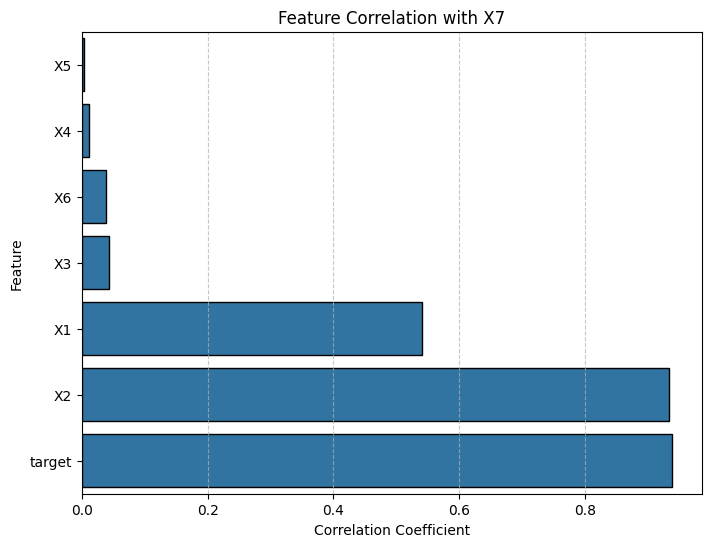

In [24]:
plot_feature_correlation(reg_train, "X7")

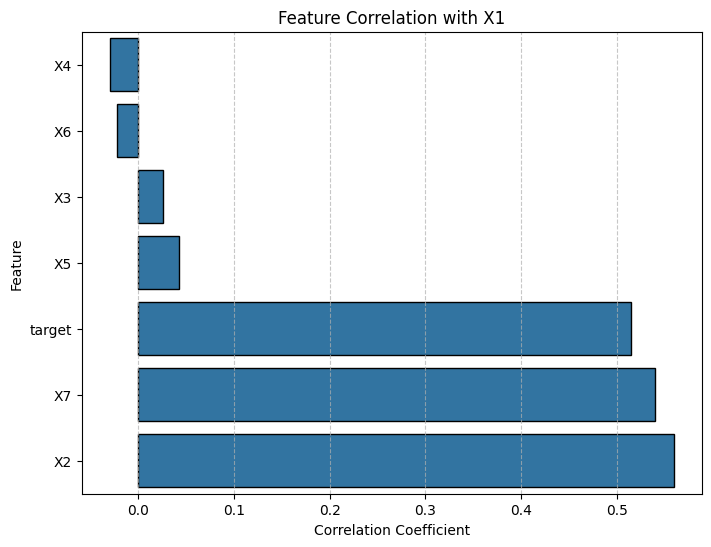

In [25]:
plot_feature_correlation(reg_train, "X1")

Como visto nos gráficos acima, X2 e X7 contém essencialmente a mesma informação em relação à target.  
X2 tem maior correlação com X1

### Pontos com target faltante  
  
A base de teste possui alguns pontos com a variável de reposta sem valor, que não poderiam ser usados normalmente para teste.  
Dessa forma, esses pontos foram transferidos à base de treinamento

In [26]:
reg_train = pd.concat([reg_train, reg_test[reg_test["target"].isnull()]], ignore_index=True)

reg_test.dropna(subset=["target"], inplace=True)

In [27]:
reg_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  715 non-null    float64
 1   X1      1123 non-null   float64
 2   X2      1112 non-null   float64
 3   X3      1123 non-null   float64
 4   X4      1123 non-null   float64
 5   X5      1123 non-null   float64
 6   X6      1123 non-null   int64  
 7   X7      1123 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 70.3 KB


### Remoção de features
  
Como visto nos gráficos acima, X2 e X7 são essencialmente a mesma variável, manter as 2 além de redundante pode prejudicar a performance do modelo devido a overfitting.  

X1 também apresenta correlação alta com X2 e X7, mas em menor grau.  
  
    
Optou-se por remover X2, por ter maior correlação com X1 e por apresentar valores faltantes

In [28]:
reg_train.drop("X2", axis=1, inplace=True)

In [29]:
reg_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  715 non-null    float64
 1   X1      1123 non-null   float64
 2   X3      1123 non-null   float64
 3   X4      1123 non-null   float64
 4   X5      1123 non-null   float64
 5   X6      1123 non-null   int64  
 6   X7      1123 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 61.5 KB


## Tratamento de dados  


*   Encoding da variável categórica (dummies)
*   Escalonamento
*   Regressão para preencher os valores faltantes de 'target'



In [30]:
reg_train["X6"].value_counts()

,count
X6,
0,377
8,373
5,373


As classes estão balanceadas em ambas as bases de dados

#### Definindo funções para tratamento dos dados

In [31]:
def add_dummies(df, col_name):
    dummies = pd.get_dummies(df[col_name], prefix=col_name).astype(float)
    df = pd.concat([df, dummies], axis=1).drop(columns=[col_name])
    return(df)

In [32]:
reg_train = add_dummies(reg_train, "X6")

In [33]:
reg_train.head()

,target,X1,X3,X4,X5,X7,X6_0,X6_5,X6_8
0,NaN,-0.546168,47.063305,1.611370,-65.882137,-16.672865,1.0,0.0,0.0
1,47.735389,3.074317,49.396649,0.261998,-66.570716,-6.664599,1.0,0.0,0.0
2,NaN,-1.485531,42.367991,3.991558,-67.108014,-30.790962,0.0,0.0,1.0
3,908.202209,6.907396,57.228787,0.256771,-66.181266,-0.726072,0.0,1.0,0.0
4,1640.461863,1.916788,51.703375,2.463790,-65.143663,8.131680,0.0,1.0,0.0


In [34]:
def gridsearch_lasso(X, y):
  params = {"alpha": np.arange(0.00001, 0.5, 0.0025)}

  kf = KFold(n_splits=5, shuffle=True)

  lasso = Lasso()

  lasso_search = GridSearchCV(lasso, param_grid=params, cv=kf, scoring=['neg_root_mean_squared_error', 'r2'],
                              refit='neg_root_mean_squared_error')
  lasso_search.fit(X, y)
  print(f"Best alpha:  {lasso_search.best_params_}")


  lasso_regressor = Lasso(alpha=lasso_search.best_params_["alpha"])
  lasso_regressor.fit(X, y)

  coeficients = np.abs(lasso_regressor.coef_)

  print(f"Best score was {lasso_search.best_score_}")

  plt.bar(X.columns, coeficients)
  plt.grid()
  plt.title("Feature Selection Based on Lasso")
  plt.xlabel("Features")
  plt.ylabel("Importance")
  plt.ylim(0, 0.6)
  plt.show()

  return(lasso_regressor)

In [35]:
def scale_dataframe(df, target):

	columns_to_scale = df.drop(target, axis=1).columns

	scaler = MinMaxScaler()
	scaled_df = df.copy()
	scaled_df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

	return(scaled_df)

#### Comparando o conjunto sem target e o conjunto com target:

In [36]:
reg_train[reg_train["target"].isnull()].describe()

,target,X1,X3,X4,X5,X7,X6_0,X6_5,X6_8
count,0.0,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,NaN,0.306244,55.094021,2.744157,-65.704197,-11.957856,0.401961,0.306373,0.291667
std,NaN,2.907337,49.772182,2.548282,7.823217,9.674737,0.490896,0.461552,0.455088
min,NaN,-8.699406,38.372047,0.002360,-106.764693,-69.835905,0.000000,0.000000,0.000000
25%,NaN,-1.742482,46.418148,0.861040,-69.157466,-15.947374,0.000000,0.000000,0.000000
50%,NaN,0.271219,49.484570,1.932054,-65.679464,-11.731868,0.000000,0.000000,0.000000
75%,NaN,2.047321,52.302071,3.767995,-61.340291,-8.104735,1.000000,1.000000,1.000000
max,NaN,7.793605,500.000000,13.591178,-35.249153,27.650719,1.000000,1.000000,1.000000


In [37]:
reg_train[reg_train["target"].notnull()].describe()

,target,X1,X3,X4,X5,X7,X6_0,X6_5,X6_8
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,1349.940229,3.367040,50.089566,2.330196,-64.986930,3.623453,0.297902,0.346853,0.355245
std,1593.201095,2.830287,4.067153,2.498788,9.524299,7.604867,0.457656,0.476302,0.478922
min,0.062551,-4.079909,38.035456,0.009815,-121.450423,-8.898633,0.000000,0.000000,0.000000
25%,230.632308,1.510589,47.423904,0.597640,-69.085396,-2.288504,0.000000,0.000000,0.000000
50%,808.374368,3.354627,50.137764,1.526100,-65.078252,2.482539,0.000000,0.000000,0.000000
75%,1849.754221,5.127394,52.871490,3.143906,-61.117380,8.103036,1.000000,1.000000,1.000000
max,10382.469480,12.380693,62.972372,18.813009,53.919202,30.376348,1.000000,1.000000,1.000000


In [38]:
def find_regression_model(X, y):
    print("X:", type(X), X.shape)
    print("y:", type(y), y.shape)

    # Define models with their parameter grids for GridSearchCV
    models_with_params = {
        "Random Forest": (RandomForestRegressor(), {
            'n_estimators': [30, 60, 120],
            'max_depth': [None, 6, 18, 36],
            'min_samples_split': [2, 4, 8]
        }),
        "Gradient Boosting": (GradientBoostingRegressor(), {
            'n_estimators': [24, 64, 128],
            'learning_rate': [0.005, 0.01, 0.025],
            'max_depth': [2, 6, 18]
        }),
        "Decision Tree": (DecisionTreeRegressor(), {
            'max_depth': [None, 3, 9, 18],
            'min_samples_split': [2, 4, 8]
        }),
        "Ridge": (Ridge(), {
            'alpha': [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr'],
            'fit_intercept': [True, False]
        }),
        "Lasso": (Lasso(), {
            'alpha': [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5],
            'max_iter': [1000, 2000, 3000],
            'selection': ['cyclic', 'random'],
            'fit_intercept': [True, False]
        })
    }

    # Initialize metrics for best model
    best_model = None
    best_r2 = -np.inf
    best_rmse = np.inf
    best_params = None

    # K-Fold Cross-Validation
    kf = KFold(n_splits=5, shuffle=True)

    # Custom RMSE scorer for cross-validation
    rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

    # Loop through models and their parameter grids
    for name, (model, params) in models_with_params.items():
        # Perform grid search with cross-validation
        grid_search = GridSearchCV(model, params, cv=kf, scoring='r2')
        grid_search.fit(X, y)

        # Best model from grid search
        best_candidate_model = grid_search.best_estimator_
        best_params_candidate = grid_search.best_params_

        # Evaluate with cross_val_score using R2 and RMSE
        r2_scores = cross_val_score(best_candidate_model, X, y, cv=kf, scoring='r2')
        rmse_scores = cross_val_score(best_candidate_model, X, y, cv=kf, scoring=rmse_scorer)

        # Calculate mean scores
        mean_r2 = np.mean(r2_scores)
        mean_rmse = -np.mean(rmse_scores)  # Convert to positive RMSE

        print(f"Model: {name}, Best Params: {best_params_candidate}, R2 Score: {mean_r2:.4f}, RMSE: {mean_rmse:.4f}")

        # Update best model if this one is better
        if mean_r2 > best_r2 or (round(mean_r2, 2) == round(best_r2, 2) and mean_rmse < best_rmse):
            best_model = best_candidate_model
            best_r2 = mean_r2
            best_rmse = mean_rmse
            best_params = best_params_candidate

    # Train the best model on the entire dataset
    best_model.fit(X, y)

    # Output the best model, parameters, and its metrics
    print(f"\nBest Model: {best_model.__class__.__name__}")
    print(f"Best Parameters: {best_params}")
    print(f"Best R2 Score: {best_r2:.4f}")
    print(f"Best RMSE: {best_rmse:.4f}")

    # Plot feature importances if the model has this attribute
    if hasattr(best_model, 'feature_importances_'):
        feature_importances = best_model.feature_importances_
        feature_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)

        # Plot feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_df)
        plt.title(f'Feature Importances for {best_model.__class__.__name__}')
        plt.show()
    # For Ridge and Lasso models, plot coefficients instead
    elif hasattr(best_model, 'coef_'):
        coef_df = pd.DataFrame({
            'Feature': X.columns,
            'Coefficient': np.abs(best_model.coef_)
        }).sort_values(by='Coefficient', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Coefficient', y='Feature', data=coef_df)
        plt.title(f'Feature Coefficients for {best_model.__class__.__name__}')
        plt.show()

    return best_model, best_params, best_r2, best_rmse

In [40]:
X = scale_dataframe(reg_train,["target", "X1", "X7"]).dropna().drop(["target", "X1", "X7"], axis=1)
y = reg_train["target"].dropna()

X: <class 'pandas.core.frame.DataFrame'> (715, 6)
y: <class 'pandas.core.series.Series'> (715,)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Model: Random Forest, Best Params: {'max_depth': 6, 'min_samples_split': 8, 'n_estimators': 120}, R2 Score: -0.0769, RMSE: 1631.2621


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Model: Gradient Boosting, Best Params: {'learning_rate': 0.025, 'max_depth': 2, 'n_estimators': 24}, R2 Score: -0.0084, RMSE: 1587.2151


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Model: Decision Tree, Best Params: {'max_depth': 3, 'min_samples_split': 2}, R2 Score: -0.0988, RMSE: 1694.2212


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Model: Ridge, Best Params: {'alpha': 0.5, 'fit_intercept': True, 'solver': 'auto'}, R2 Score: -0.0003, RMSE: 1581.0613


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.124e+07, tolerance: 2.613e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.859e+06, tolerance: 2.373e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.128e+06, tolerance: 2.445e

Model: Lasso, Best Params: {'alpha': 0.5, 'fit_intercept': True, 'max_iter': 2000, 'selection': 'random'}, R2 Score: -0.0201, RMSE: 1591.2694

Best Model: Ridge
Best Parameters: {'alpha': 0.5, 'fit_intercept': True, 'solver': 'auto'}
Best R2 Score: -0.0003
Best RMSE: 1581.0613


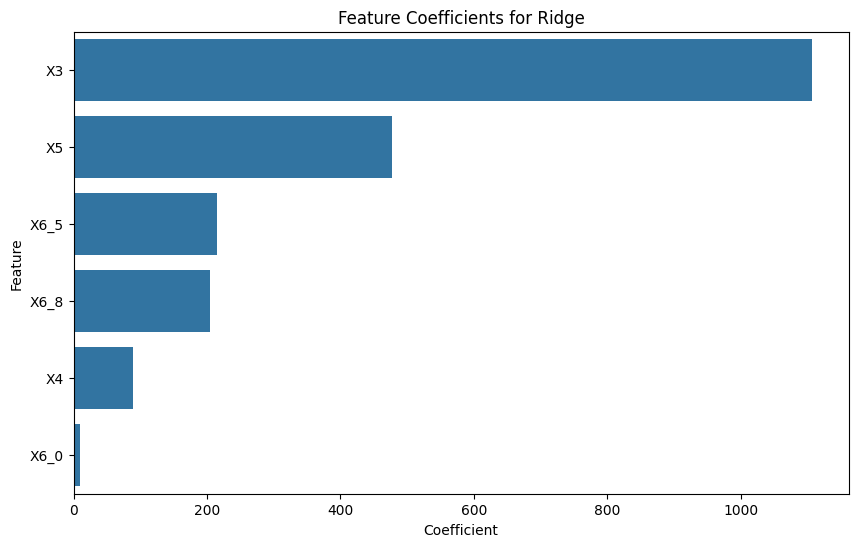

In [42]:
missing_target_regressor = find_regression_model(X, y)

In [43]:
missing_target = scale_dataframe(reg_train[reg_train["target"].isnull()],["target", "X1", "X7"]).drop(["target", "X1", "X7"], axis=1)
reg_train.loc[reg_train["target"].isnull(), "target"] = missing_target_regressor[0].predict(missing_target)

In [44]:
reg_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  1123 non-null   float64
 1   X1      1123 non-null   float64
 2   X3      1123 non-null   float64
 3   X4      1123 non-null   float64
 4   X5      1123 non-null   float64
 5   X7      1123 non-null   float64
 6   X6_0    1123 non-null   float64
 7   X6_5    1123 non-null   float64
 8   X6_8    1123 non-null   float64
dtypes: float64(9)
memory usage: 79.1 KB


Com a target preenchida via regressão para os valores faltantes, temos uma base completa para o treinamento do modelo final

# Treinando o modelo final

X: <class 'pandas.core.frame.DataFrame'> (1123, 8)
y: <class 'pandas.core.series.Series'> (1123,)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Model: Random Forest, Best Params: {'max_depth': 18, 'min_samples_split': 4, 'n_estimators': 60}, R2 Score: 0.8880, RMSE: 395.8209


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Model: Gradient Boosting, Best Params: {'learning_rate': 0.025, 'max_depth': 6, 'n_estimators': 128}, R2 Score: 0.8691, RMSE: 440.6190


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Model: Decision Tree, Best Params: {'max_depth': 9, 'min_samples_split': 8}, R2 Score: 0.8658, RMSE: 512.8529


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Model: Ridge, Best Params: {'alpha': 0.5, 'fit_intercept': False, 'solver': 'auto'}, R2 Score: 0.2934, RMSE: 1065.8143


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.143e+07, tolerance: 1.506e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.094e+07, tolerance: 1.507e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.436e+05, tolerance: 2.985e

Model: Lasso, Best Params: {'alpha': 0.5, 'fit_intercept': True, 'max_iter': 1000, 'selection': 'random'}, R2 Score: 0.3001, RMSE: 1068.3078

Best Model: RandomForestRegressor
Best Parameters: {'max_depth': 18, 'min_samples_split': 4, 'n_estimators': 60}
Best R2 Score: 0.8880
Best RMSE: 395.8209


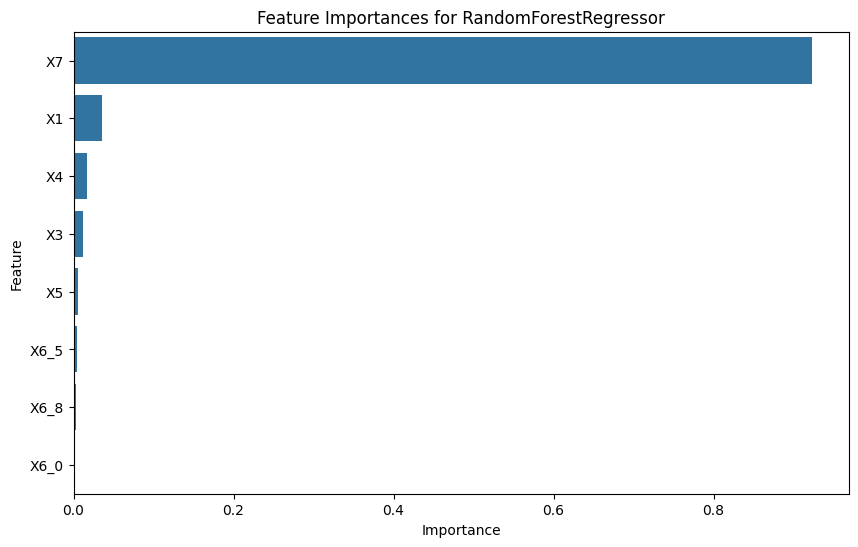

In [45]:
X = scale_dataframe(reg_train,["target"]).drop(["target"], axis=1)
y = reg_train["target"].dropna()

final_regressor = find_regression_model(X, y)

In [46]:
model = final_regressor[0]

In [47]:
def add_dummies(df, col_name): # sem remover a categorica original, dessa vez
    dummies = pd.get_dummies(df[col_name], prefix=col_name).astype(float)
    df = pd.concat([df, dummies], axis=1)
    return(df)

In [48]:
final_predictions = model.predict(scale_dataframe(add_dummies(reg_test, "X6"), ["target", "X6", "X2"]).drop(["target", "X6", "X2"], axis=1))

In [49]:
reg_test["predictions"] = final_predictions

In [50]:
reg_test.describe()

,target,X1,X2,X3,X4,X5,X6,X7,predictions
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1083.167620,3.023737,1.067195,50.249704,2.508638,-66.020712,4.450000,2.507909,1116.934446
std,1266.764414,2.483370,2.950015,4.119242,2.535392,7.839333,3.282381,6.932535,616.099538
min,0.619759,-3.656479,-3.607201,38.282205,0.017793,-123.280755,0.000000,-8.476921,275.459940
25%,203.306229,1.150538,-1.313719,47.832517,0.751667,-69.679391,0.000000,-3.087240,894.302831
50%,623.905972,3.241830,0.730865,50.340714,1.694886,-66.036327,5.000000,1.717532,1095.402954
75%,1522.742335,4.544082,2.850473,52.859615,3.546714,-62.075119,8.000000,6.698611,1277.028856
max,8270.877273,9.586412,11.610249,65.704951,16.798910,-43.237419,8.000000,27.284085,8540.869113


<Axes: xlabel='target', ylabel='predictions'>

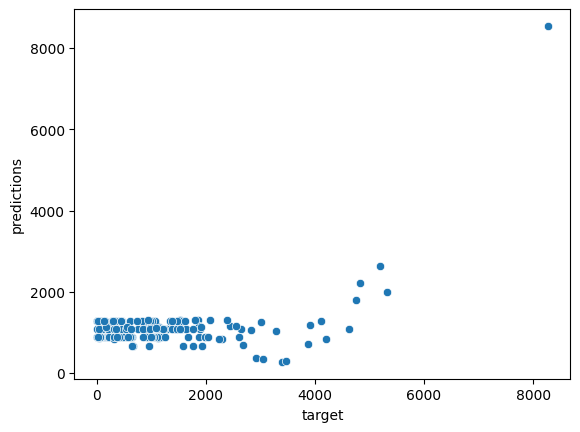

In [51]:
sns.scatterplot(reg_test, x="target", y="predictions")

In [52]:
def train_best_ridge_regression(X, y, alpha_range=[0.01, 0.1, 0.15, 0.30, 0.5, 0.64, 0.75]):
    best_r2 = -np.inf
    best_rmse = np.inf
    best_model = None
    best_alpha = None

    for alpha in alpha_range:
        # Train Ridge regression model with current alpha
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(X, y)

        # Make predictions
        y_pred = ridge_model.predict(X)

        # Calculate R2 and RMSE
        r2 = r2_score(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        print(f"Alpha: {alpha} | R2 Score: {r2:.4f} | RMSE: {rmse:.4f}")

        # Check if this model is the best so far
        if r2 > best_r2 or (r2 == best_r2 and rmse < best_rmse):
            best_r2 = r2
            best_rmse = rmse
            best_model = ridge_model
            best_alpha = alpha

    print(f"\nBest Alpha: {best_alpha}")
    print(f"Best R2 Score: {best_r2:.4f}")
    print(f"Best RMSE: {best_rmse:.4f}")

    # Calculate normalized feature importance for the best model
    feature_importances = np.abs(best_model.coef_)
    normalized_importances = feature_importances / feature_importances.sum()  # Scale to sum to 1

    feature_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': normalized_importances
    }).sort_values(by='Importance', ascending=False)

    # Plot normalized feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_df)
    plt.title(f'Normalized Feature Importances for Ridge Regression (Alpha={best_alpha})')
    plt.show()

    return best_model, best_alpha, best_r2, best_rmse

Alpha: 0.01 | R2 Score: 0.3131 | RMSE: 1059.1396
Alpha: 0.1 | R2 Score: 0.3131 | RMSE: 1059.1504
Alpha: 0.15 | R2 Score: 0.3131 | RMSE: 1059.1639
Alpha: 0.3 | R2 Score: 0.3130 | RMSE: 1059.2338
Alpha: 0.5 | R2 Score: 0.3128 | RMSE: 1059.3899
Alpha: 0.64 | R2 Score: 0.3126 | RMSE: 1059.5374
Alpha: 0.75 | R2 Score: 0.3124 | RMSE: 1059.6731

Best Alpha: 0.01
Best R2 Score: 0.3131
Best RMSE: 1059.1396


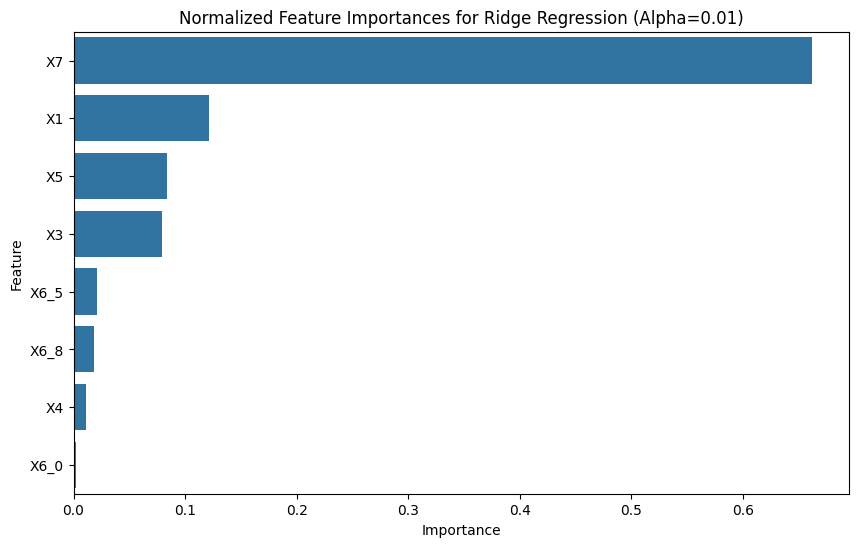

In [53]:
X = scale_dataframe(reg_train,["target"]).drop(["target"], axis=1)
y = reg_train["target"].dropna()

ridge = train_best_ridge_regression(X, y)

In [54]:
ridge_predictions = ridge[0].predict(scale_dataframe(add_dummies(reg_test, "X6"), ["target", "X6", "X2", "predictions"]).drop(["target", "X6", "X2", "predictions"], axis=1))

In [55]:
reg_test["ridge"] = ridge_predictions

<Axes: xlabel='target', ylabel='ridge'>

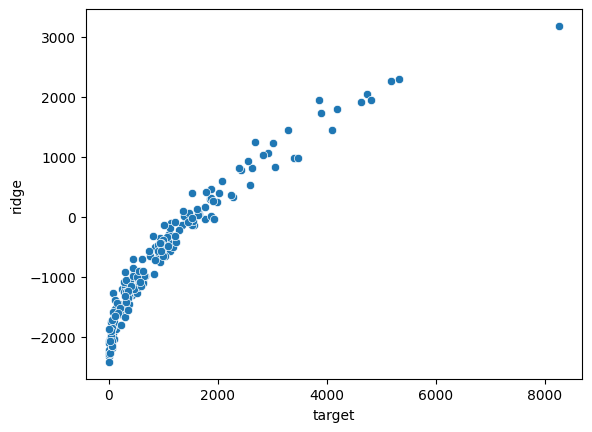

In [56]:
sns.scatterplot(reg_test, x="target", y="ridge")

<Axes: >

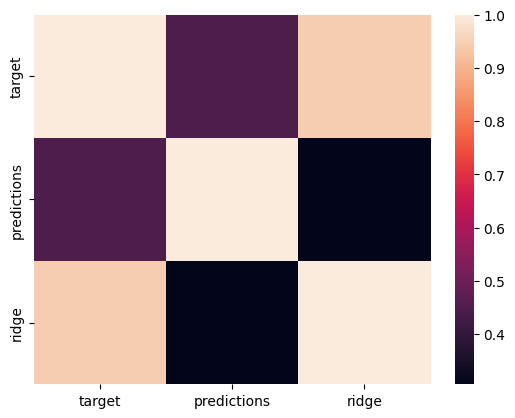

In [57]:
sns.heatmap(reg_test[["target", "predictions", "ridge"]].corr())

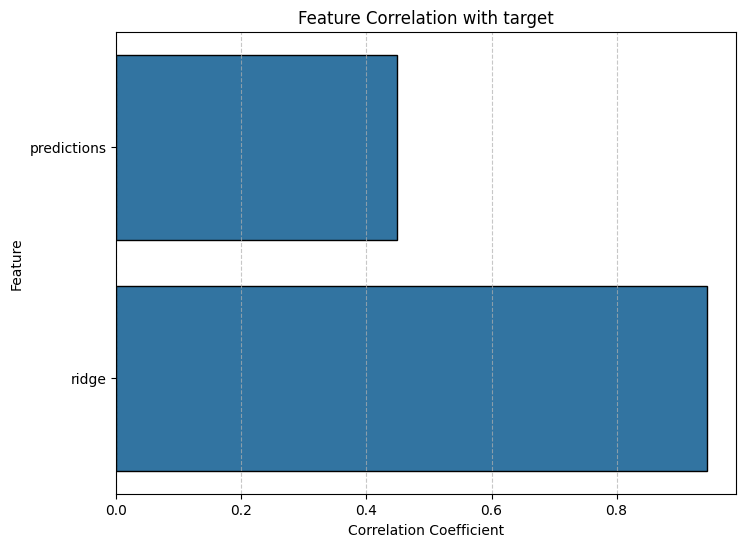

In [58]:
plot_feature_correlation(reg_test[["target", "predictions", "ridge"]], "target")



*   As previsões realizadas pelo modelo RandomForest, selecionado minimizando o R² e o RSME apresentaram pouca correlação com a variável de resposta real   

*   O modelo de regressão Ridge se mostrou mais apropriado nesse caso, já que a regularização ajuda a mitigar o Bias decorrente da alta colinearidade presente entre múltiplas variáveis  

*    Outra opção seria realizar uma redução de dimensionalidade (com PCA, por exemplo), mas se perderia explicabilidade e a definição do problema mencionava especificamente uma análise da importância de cada feature original nas previsões


